In [ ]:
# Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
# Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
# Разделите данные на выборку для обучения и тестирования
# Постройте модель LDA
# Визуализируйте предсказания для тестовой выборки и центры классов
# Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
# Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [25]:
# подготовка
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
# создаю основной датафрейм
# print(load_iris().DESCR) # посмотреть содержимое датафрейма
df = pd.DataFrame(data = np.c_[iris['data'],iris['target']], columns=iris['feature_names']+['target'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [49]:
# модифицирую датафрейм
dfm = df.copy()
dfm = dfm.drop(columns=['petal length (cm)', 'petal width (cm)', 'target']) # оставляем 2 показателя как X
variety = iris.target # целевая переменная - делается не через pandas, а как обычный python

In [54]:
# импортирую train_test_split и разделяю выборку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfm, variety, random_state=42)

In [55]:
# запускаю LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [58]:
# создаю датафрейм для спавнения
output = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [60]:
# сморю точность результата
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

In [76]:
# центроиды
lda.means_


array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

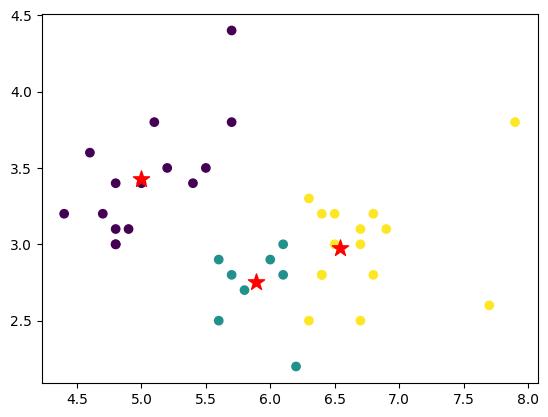

In [78]:
# строю график
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# показываю центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [79]:
# k-means
from sklearn.cluster import KMeans

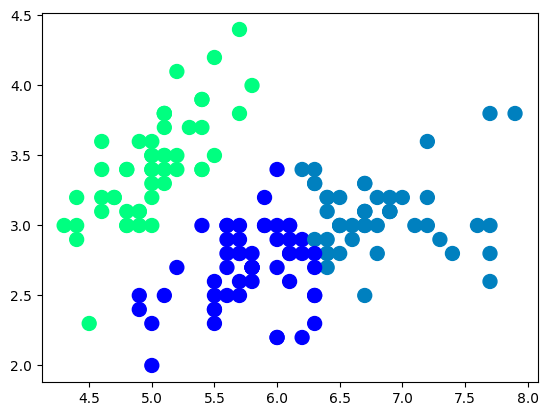

In [105]:
# настраиваю k-means
# указываю количество кластеров, т.к. знаю, что разновидностей цветков 3, то и ставлю 3
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(dfm) # прогоняю через весь датафрейм
# clusters # что-то получается
# визуализирую
plt.scatter(dfm.iloc[:, 0], dfm.iloc[:, 1], c=clusters, cmap='winter', s=100)

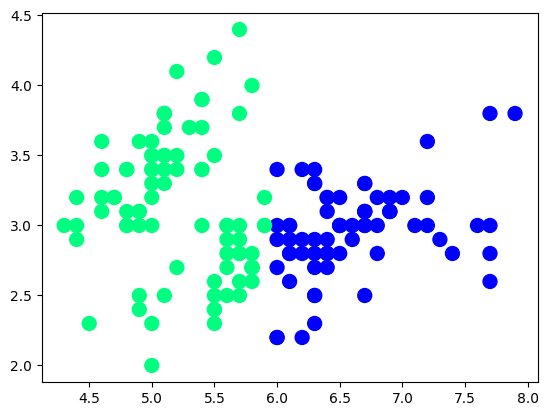

In [120]:
# для экспеиментов с другим числом кластеров
# указываю количество кластеров, т.к. знаю, что разновидностей цветков 3, то и ставлю 3
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(dfm) # прогоняю через весь датафрейм
# clusters # что-то получается
# визуализирую
plt.scatter(dfm.iloc[:, 0], dfm.iloc[:, 1], c=clusters, cmap='winter', s=100)